# Package samanta.etdex
Le package etdex dispose de fonctions permettant de manpuler des fichiers ETDEX issus d'extractions de la base MOISE. Pour l'instant seuls les fichiers transitoires sont traités.

In [4]:
# from importlib import reload
import os
from tabata import etdex

Je mets souvent une commande reload pour vérifier la mise au point de mes codes.

In [5]:
%reload_ext autoreload
%autoreload 2

## L'objet Etdex
L'objet etdex est créé à aprtir d'un fichier ETDEX : couple .xml et .dat.
Il contient des informations sur l'enregistrement. La création de l'objet observe le contenu, vérifie la syntaxe du fichier XML et du fichier binaire DAT mais ne charge pas les données.

In [6]:
dirname = os.path.expanduser('~/wrk/bancs/data')
filename = os.path.expanduser("~/wrk/bancs/data/sam146/BPOL_OATB__TR__DEV__d20070601_h121558__100.xml")
e = etdex.Etdex(filename)
print(e)

Etdex(H:\/wrk/bancs/data/sam146/BPOL_OATB__TR__DEV__d20070601_h121558__100.xml) - big-endian
    Banc POL_OATB test le 2007-05-30 13:52:03 de 27.249 secondes
    SaM146 Moteur 003 Montage 001
    2715 mesures, fréquence 100 Hz, 5 variables.


L'objet contient un certain nombre d'informations.

In [7]:
print(e.filename)
print(e.datfile)                 # Le fichierbinaire associé.
print("banc    :", e.banc)
print("moteur  :", e.moteur)
print("numero  :", e.numero)
print("montage :", e.montage)
print("date    :", e.date)       # La date de l'essai.
print("start   :", e.start)      # Le début de l'enregistrement.
print("end     :", e.end)        # La fin de l'enregistrement.
print("duree   :", e.duree)
print("freq    :", e.freq)       # La fréquence en Hz
print("sfreq)  :", e.sfreq)      # La fréquence représentée en string
print("span    :", e.span)       # L'écart inter mesures (compatible pandas)

H:\/wrk/bancs/data/sam146/BPOL_OATB__TR__DEV__d20070601_h121558__100.xml
H:\/wrk/bancs/data/sam146\BPOL_OATB__TR__DEV__d20070601_h121558__100.dat
banc    : POL_OATB
moteur  : SaM146
numero  : 003
montage : 001
date    : 2007-05-30 13:52:03
start   : 2007-06-01 12:15:58
end     : 2007-06-01 12:16:25
duree   : 27.249
freq    : 100
sfreq)  : 100 Hz
span    : 10L


Les labels des mesures observées sont aussi disponibles ainsi que l'index temporel. Une liste (columns) contient les noms des labels conaténés avec leurs unités entre crochets.

In [8]:
print(e.index)
print("names   :", e.names)
print("units   :", e.units)
print("columns :", e.columns)

DatetimeIndex([       '2007-06-01 12:15:58', '2007-06-01 12:15:58.010000',
               '2007-06-01 12:15:58.020000', '2007-06-01 12:15:58.030000',
               '2007-06-01 12:15:58.040000', '2007-06-01 12:15:58.050000',
               '2007-06-01 12:15:58.060000', '2007-06-01 12:15:58.070000',
               '2007-06-01 12:15:58.080000', '2007-06-01 12:15:58.090000',
               ...
               '2007-06-01 12:16:25.050000', '2007-06-01 12:16:25.060000',
               '2007-06-01 12:16:25.070000', '2007-06-01 12:16:25.080000',
               '2007-06-01 12:16:25.090000', '2007-06-01 12:16:25.100000',
               '2007-06-01 12:16:25.110000', '2007-06-01 12:16:25.120000',
               '2007-06-01 12:16:25.130000', '2007-06-01 12:16:25.140000'],
              dtype='datetime64[ns]', name='BPOL_OATB__TR__DEV__d20070601_h121558__100', length=2715, freq='10L')
names   : ['TIMEST9999', 'PLC_FUEL00', 'PFLPFPO', 'PFLPFPI', 'PFHPFPI']
units   : ['s', '-', 'bar r', 'bar r', 'bar 

### La méthode data()
Cette méthode récupère le contenu du fichier binaire est le stocke dans un dataframe.

In [9]:
df = e.data()
print(type(df))
print("df.shape =", df.shape)

<class 'pandas.core.frame.DataFrame'>
df.shape = (2715, 5)


Le nom du ficheir initial est sauvegardé dans le champ name de l'index du DataFrame.

In [10]:
df.index.name

'BPOL_OATB__TR__DEV__d20070601_h121558__100'

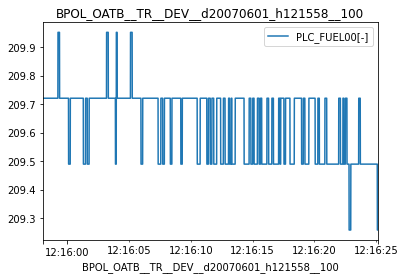

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(y='PLC_FUEL00[-]',title=df.index.name) ;

In [12]:
cols = list(df.columns)
[i for i in cols if 'FUEL' in i]

['PLC_FUEL00[-]']

## Répertoires de fichiers ETDEX
Deux fonctions permettent de travailler sur des listes de fichiers ETDEX stockés dans un même répertoire. La première renvoie le nombre de transitoires (nombre de fichiers .dat) et la seconde est un itérateur.

### Fonction nbtransient()
Comptabilise le nombre de fichiers .dat.

In [14]:
samdirname = os.path.join(dirname,'sam146')
etdex.nbtransient(samdirname)

543

### Itérateur iterator()
Un itérateur sur les fichiers ETDEX du répertoire passé en argument.
Un second argument optionnel permet de n'itérer que sur les premiers fichiers (utile pour les tests).

In [15]:
for e in etdex.iterator(samdirname,nbmax=3):
    print(e.filename)

H:\/wrk/bancs/data\sam146\BCIAM_C1A__TR__DEV__d20070907_h124025__17.xml
H:\/wrk/bancs/data\sam146\BPOL_OATB__TR__DEV__d20070601_h121558__100.xml
H:\/wrk/bancs/data\sam146\BPOL_OATB__TR__DEV__d20070601_h124523__100.xml


### Itérateur dataiterator()
Cet itérateur renvoie directement des DataFrames pandas.

In [16]:
for df in etdex.dataiterator(samdirname,nbmax=3):
    print(df.index.name, df.shape)

BCIAM_C1A__TR__DEV__d20070907_h124025__17 (4951, 23)
BPOL_OATB__TR__DEV__d20070601_h121558__100 (2715, 5)
BPOL_OATB__TR__DEV__d20070601_h124523__100 (4928, 5)


## Fonction de conversion HDF5
Deux fonctions transfèrent les données d'un répertoire de fichiers ETDEX vers le format HDF5.
* to_hdf5() copie les DataFrame tels quels dans un HDFStore.
* banalise() transforme les fichiers avant de créer le HDFStore pour autoriser une distribution de données banalisées.

### Fonction to_hdf5()
Les données d'un répertoire ETDEX sont stockées dans un HDFStore. Chaque enregistrement est stocké suivant le nom du fichier ETDEX. La fonction renvoie le nombre d'enregistrements stockés.

* Le premier argument (dirname) est le nom du répertoire de fichiers ETDEX.
* Le second argument (storename) est le nom (chemin complet) du fichiers HDF5 de stockage.
* Un troisième argument optionnel (nbmax) permet de limiter le nombre d'enregistrements à sauvegarder.

Nécessite les packages "pandas" et "tables".

In [17]:
storename = os.path.normpath(os.path.join(dirname,'../extract/extrait.h5'))
nb = etdex.to_hdf5(samdirname,storename,nbmax=5)

In [18]:
nb

5

In [19]:
storedir = os.path.dirname(storename)
storedir

'H:\\wrk\\bancs\\extract'

In [20]:
!dir H:\wrk\bancs\extract

 Le volume dans le lecteur H s'appelle Windows
 Le num‚ro de s‚rie du volume est 084B-F5B9

 R‚pertoire de H:\wrk\bancs\extract

02/02/2020  20:18    <DIR>          .
02/02/2020  20:18    <DIR>          ..
06/11/2019  11:11             5ÿ724 alias.txt
03/02/2020  12:08         1ÿ271ÿ880 banal.h5
03/02/2020  12:08             7ÿ174 banal.log
06/10/2020  14:04         1ÿ340ÿ528 extrait.h5
02/02/2020  20:10    <DIR>          old
               4 fichier(s)        2ÿ625ÿ306 octets
               3 R‚p(s)  63ÿ215ÿ419ÿ392 octets libres


_Jérôme Lacaille (YXE)_